# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto: Classificação de Imagens de Animais</span>

<br><br>

# Contexto

- Em uma pequena cidade rodeada por florestas exuberantes, vivia Júlia, uma jovem bióloga apaixonada pela fauna local. Júlia trabalhava em um centro de conservação de animais, onde sua principal responsabilidade era monitorar as populações de diferentes espécies na região. Com o passar do tempo, ela percebeu que a quantidade de dados visuais que acumulava estava se tornando incontrolável. Havia milhares de fotos de câmeras de vigilância espalhadas pela floresta, capturando imagens de diversas espécies de animais dia e noite.

- A análise manual dessas imagens era um processo demorado e propenso a erros. Muitas vezes, Júlia e seus colegas passavam horas tentando identificar corretamente as espécies nas fotos. Isso não apenas atrasava os relatórios, mas também comprometia a precisão dos dados coletados, impactando negativamente os esforços de conservação.

- Cansada dos desafios enfrentados, Júlia decidiu que era hora de trazer tecnologia ao seu trabalho. Ela ouviu falar sobre a inteligência artificial e como poderia ser usada para automatizar tarefas de classificação de imagens. Com essa ideia em mente, Júlia se inscreveu em um curso de Data Science e Machine Learning, onde aprendeu sobre redes neurais convolucionais (CNNs) e sua capacidade de processar imagens de forma eficiente.

<br>

### Criação do Projeto

- Depois de adquirir o conhecimento necessário, Júlia decidiu criar um projeto de classificação de imagens de animais. Ela sabia que isso não só iria ajudar em seu trabalho, mas também poderia ser uma contribuição significativa para a comunidade científica.

- Júlia começou o projeto baixando um conjunto de dados de imagens de animais disponíveis no Kaggle, conhecido como "Animal-10 dataset". Este conjunto de dados continha milhares de imagens de 10 diferentes espécies de animais, proporcionando uma base robusta para treinar seu modelo de classificação.

### Passos do Projeto

- Coleta de Dados: Júlia carregou todas as imagens do diretório e associou os rótulos correspondentes.
- Análise dos Dados: Antes de prosseguir, ela realizou uma análise preliminar para garantir que os dados estavam corretos e prontos para o pré-processamento.
- Pré-processamento dos Dados: Ela normalizou as imagens e codificou os rótulos para preparar os dados para o modelo de machine learning.
- Criação do Modelo: Júlia construiu uma rede neural convolucional (CNN) utilizando Keras para processar e classificar as imagens.
- Treinamento do Modelo: Com os dados prontos, ela treinou o modelo e validou seu desempenho.
- Avaliação do Modelo: Júlia avaliou a precisão do modelo utilizando os dados de teste, ajustando conforme necessário para melhorar o desempenho.
- Salvamento e Carregamento do Modelo: Após treinar o modelo com sucesso, ela salvou o modelo para uso futuro.
- Previsões com Novas Imagens: Júlia implementou um método para carregar e prever a classe de novas imagens capturadas pelas câmeras de vigilância.

<br>


## Objetivo

- O modelo de Júlia deve classificar as espécies de animais com alta precisão, automatizando um processo que antes era feito manualmente. Isso permitirá que Júlia e sua equipe dedicassem mais tempo a outras tarefas importantes e melhorassem a eficiência e a precisão dos esforços de conservação.

<br> <br>

<br><br>

## Importando Pacotes

In [1]:
import os  # Para interagir com o sistema operacional, manipular arquivos e diretórios.
import numpy as np  # Para operações numéricas em arrays e matrizes, essencial para manipulação de dados de imagens.
import pandas as pd  # Para manipulação e análise de dados, útil para lidar com e visualizar informações do conjunto de dados.
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator  # Para carregar imagens, converter imagens em arrays e realizar augmentação de dados de imagem.

import matplotlib.pyplot as plt  # Para criar visualizações como gráficos e diagramas.
import seaborn as sns  # Para visualização avançada de dados, construído sobre o Matplotlib.

from sklearn.model_selection import train_test_split  # Para dividir o conjunto de dados em conjuntos de treinamento e teste.
from sklearn.preprocessing import LabelEncoder  # Para codificar rótulos de string em valores numéricos.

from tensorflow.keras.utils import to_categorical  # Para converter rótulos em formato one-hot encoding.

from tensorflow.keras.models import Sequential  # Para criar um modelo sequencial de rede neural.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Para adicionar camadas à rede neural, incluindo convolucional, pooling, flattening, densa e dropout.

from tensorflow.keras.models import load_model  # Para carregar um modelo previamente salvo.

2024-06-10 17:41:55.688117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-10 17:41:55.688132: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<br><br>

## Download Conjunto de Dados

In [2]:
# Link para o download do conjunto de dados
data_url = "https://www.kaggle.com/alessiocorrado99/animals10"
print(f"Baixe o conjunto de dados em: {data_url}")

Baixe o conjunto de dados em: https://www.kaggle.com/alessiocorrado99/animals10


<br>

## Carregando Conjunto de Dados

- Carregando as imagens e rótulos do diretório do conjunto de dados.

In [3]:
def load_images(directory, target_size=(128, 128), max_images=1000):
    images = []
    labels = []
    label_count = {}
    
    for label in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, label)):
            label_count[label] = 0
            
    for label in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, label)):
            for file in os.listdir(os.path.join(directory, label)):
                if label_count[label] < max_images // len(label_count):
                    img = load_img(os.path.join(directory, label, file), target_size=target_size)
                    img_array = img_to_array(img)
                    images.append(img_array)
                    labels.append(label)
                    label_count[label] += 1
                if len(images) >= max_images:
                    break
    return np.array(images), np.array(labels)

# Atualize o caminho do diretório após o download do dataset
data_dir = 'dados/animals/raw-img'
images, labels = load_images(data_dir, max_images=2400)

# Verificar as dimensões dos dados
print(f'Total de imagens: {images.shape[0]}')
print(f'Dimensão de cada imagem: {images.shape[1:]}')
print(f'Total de rótulos: {len(labels)}')

Total de imagens: 2400
Dimensão de cada imagem: (128, 128, 3)
Total de rótulos: 2400


In [4]:
# Dicionário de tradução
translate = {
    "cane": "cachorro",
    "cavallo": "cavalo",
    "elefante": "elefante",
    "farfalla": "borboleta",
    "gallina": "galinha",
    "gatto": "gato",
    "mucca": "vaca",
    "pecora": "ovelha",
    "ragno": "aranha",
    "scoiattolo": "esquilo"
}

# Aplicar a tradução aos rótulos
labels_translated = np.array([translate[label] for label in labels])

<br>

## Análise dos Dados

- Realizando uma análise preliminar dos dados para verificar se estão corretos e prontos para o pré-processamento.

Total de imagens: 2400
Dimensão de cada imagem: (128, 128, 3)


Total de rótulos: 2400
galinha      240
cavalo       240
aranha       240
elefante     240
vaca         240
ovelha       240
borboleta    240
esquilo      240
cachorro     240
gato         240
dtype: int64


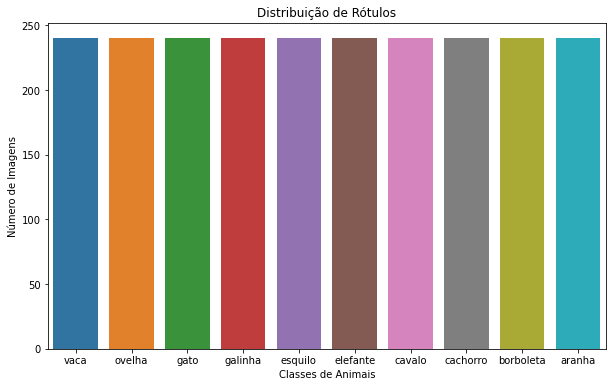

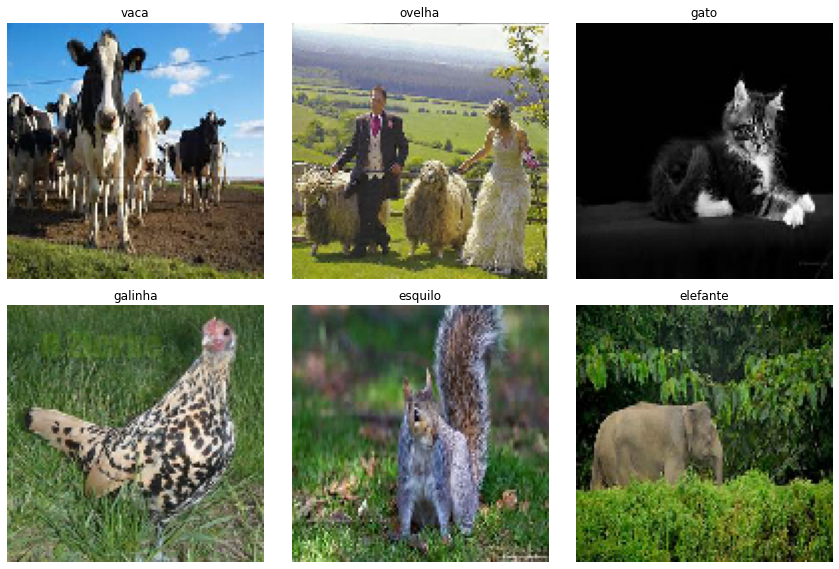

In [5]:
# Verificar as dimensões dos dados
print(f'Total de imagens: {images.shape[0]}')
print(f'Dimensão de cada imagem: {images.shape[1:]}')
print(f'\n\nTotal de rótulos: {len(labels_translated)}')

# Verificar a distribuição dos rótulos
unique_labels, counts = np.unique(labels_translated, return_counts=True)
sorted_indices = np.argsort(counts)[::-1]

# Mostrar value_counts() dos rótulos
labels_series = pd.Series(labels_translated)
print(labels_series.value_counts())

# Plotar a distribuição dos rótulos
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_labels[sorted_indices], y=counts[sorted_indices])
plt.title('Distribuição de Rótulos')
plt.xlabel('Classes de Animais')
plt.ylabel('Número de Imagens')
plt.show()

# Mostrar algumas imagens
plt.figure(figsize=(12, 8))
for i in range(6):
    label = unique_labels[sorted_indices[i]]
    label_indices = np.where(labels_translated == label)[0]
    plt.subplot(2, 3, i+1)
    plt.imshow(images[label_indices[0]].astype('uint8'))
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

<br>

## Pré-processamento de Dados
- **Carregando e rotulando as imagens**: Utilizamos **LabelEncoder** para transformar os rótulos de texto em rótulos numéricos.
- **Dividindo os dados em treino e teste**: Utilizamos **train_test_split** para dividir os dados em conjuntos de treino (80%) e teste (20%).
- **Normalizando os dados de entrada**: As imagens são normalizadas dividindo os valores dos pixels por 255.0, colocando-os na faixa de 0, 1.
- **Codificando os rótulos em one-hot**: Os rótulos numéricos são convertidos em uma representação one-hot, essencial para a camada de saída do modelo de classificação.
<br><br>
Este bloco de código garante que os dados estejam preparados adequadamente para o treinamento do modelo de aprendizado de máquina, melhorando a eficiência e a precisão do modelo.

In [6]:
# Dividindo os dados em treino e teste e normalizando as imagens
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_translated)

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


# Verificar as dimensões dos dados de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# Normalizar os dados de entrada
X_train = X_train / 255.0
X_test = X_test / 255.0

# Codificar os rótulos em one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(1920, 128, 128, 3)
(480, 128, 128, 3)
(1920,)
(480,)


<br>

## Criação, Compilação e Treinamento do Modelo

- Construímos o modelo de rede neural convolucional (CNN) utilizando Keras.
- Compilamos o modelo com o otimizador Adam e a função de perda categorical crossentropy.
- A técnica de **augmentação** de dados gera novas imagens a partir das imagens existentes, aumentando o tamanho efetivo do dataset sem a necessidade de coletar novas imagens reais. Isso ajuda a evitar overfitting, especialmente quando o dataset original é pequeno.
- Treinamos o modelo com os dados de treinamento e validamos com os dados de teste.

In [7]:
# Criação do Modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compilação do Modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augmentação de Dados
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Treinando o Modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
print(history)

2024-06-10 17:42:00.405705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-10 17:42:00.405726: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-10 17:42:00.405745: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eduardo-Inspiron-15-3520): /proc/driver/nvidia/version does not exist
2024-06-10 17:42:00.405942: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 17:42:00.654526: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None o

Epoch 1/10
60/60 [==============================] - 18s 288ms/step - loss: 2.2973 - accuracy: 0.1453 - val_loss: 2.2097 - val_accuracy: 0.1979
Epoch 2/10
60/60 [==============================] - 17s 286ms/step - loss: 2.0669 - accuracy: 0.2536 - val_loss: 1.9472 - val_accuracy: 0.3208
Epoch 3/10
60/60 [==============================] - 17s 285ms/step - loss: 1.8303 - accuracy: 0.3505 - val_loss: 1.8142 - val_accuracy: 0.3479
Epoch 4/10
60/60 [==============================] - 17s 276ms/step - loss: 1.5729 - accuracy: 0.4417 - val_loss: 1.7532 - val_accuracy: 0.3833
Epoch 5/10
60/60 [==============================] - 18s 304ms/step - loss: 1.3351 - accuracy: 0.5359 - val_loss: 1.7368 - val_accuracy: 0.3896
Epoch 6/10
60/60 [==============================] - 17s 277ms/step - loss: 1.0361 - accuracy: 0.6526 - val_loss: 1.8288 - val_accuracy: 0.4021
Epoch 7/10
60/60 [==============================] - 18s 305ms/step - loss: 0.7634 - accuracy: 0.7474 - val_loss: 2.0246 - val_accuracy: 0.3917

<br>

## Avaliação do Modelo

- Avaliamos o desempenho do modelo utilizando os dados de teste.

In [8]:
# Avaliação
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

15/15 [==============================] - 1s 82ms/step - loss: 2.7708 - accuracy: 0.3792
Test accuracy: 0.3791666626930237


<br>

## Salvando e Carregando o Modelo

- Salvamos o modelo treinado em um arquivo e carregamos o modelo para uso futuro.

In [9]:
# Salvar o modelo
model.save('modelos_imagens/animal_classifier_model.h5')

# Carregar o modelo
model = load_model('modelos_imagens/animal_classifier_model.h5')

<br>

## Previsões com Novas Imagens

- Utilizamos o modelo para prever a classe de novas imagens. As novas imagens também precisam ser pré-processadas antes de serem passadas para o modelo.

In [10]:
def predict_image(image_path, model, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Exemplo de uso
image_path = 'novas_imagens/01.jpg'
print(predict_image(image_path, model))

elefante


<br><br>

#### Quantida de Memória

In [11]:
import psutil

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"Memory Usage: {mem_info.rss / (1024 ** 2):.2f} MB")

print_memory_usage()
images, labels = load_images(data_dir, max_images=1000)
print_memory_usage()


Memory Usage: 3423.00 MB
Memory Usage: 3216.02 MB


<br><br>

# FIM